In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df211 = pd.read_csv('211precision-old.csv')
df211_ifelse = pd.read_csv('211precision-ifelse.csv')
df211_iesign = pd.read_csv('211precision-iesign.csv')
df211_depthrecalc = pd.read_csv('211precision-depthRC.csv')
df211_ieDRC = pd.read_csv('211precision-ieDRC.csv')
df211_nohanning = pd.read_csv('211precision-nohanning.csv')
df211_ienohanning = pd.read_csv('211precision.csv')

In [3]:
(df211.first_hydrophone - df211.second_hydrophone).value_counts()

 1    134
-1    131
-2     20
 3     17
-3     14
 2      9
Name: count, dtype: int64

In [4]:
(df211_ieDRC.first_hydrophone - df211_ieDRC.second_hydrophone).value_counts()

 1    146
-1    134
 3     18
-2     13
 2      9
-3      5
Name: count, dtype: int64

In [5]:
(df211_nohanning.first_hydrophone - df211_nohanning.second_hydrophone).value_counts()

-1    142
 1    107
-2     24
 3     21
 2     20
-3     11
Name: count, dtype: int64

In [9]:
(df211_ienohanning.first_hydrophone - df211_ienohanning.second_hydrophone).value_counts()

 1    155
-1    149
-3      6
-2      6
 3      5
 2      4
Name: count, dtype: int64

In [6]:
df211['t'] = pd.to_datetime(df211.origin_time).diff().apply(lambda t: t.total_seconds()).fillna(0).cumsum()

Text(0.5, 1.0, 'ifelse no hanning')

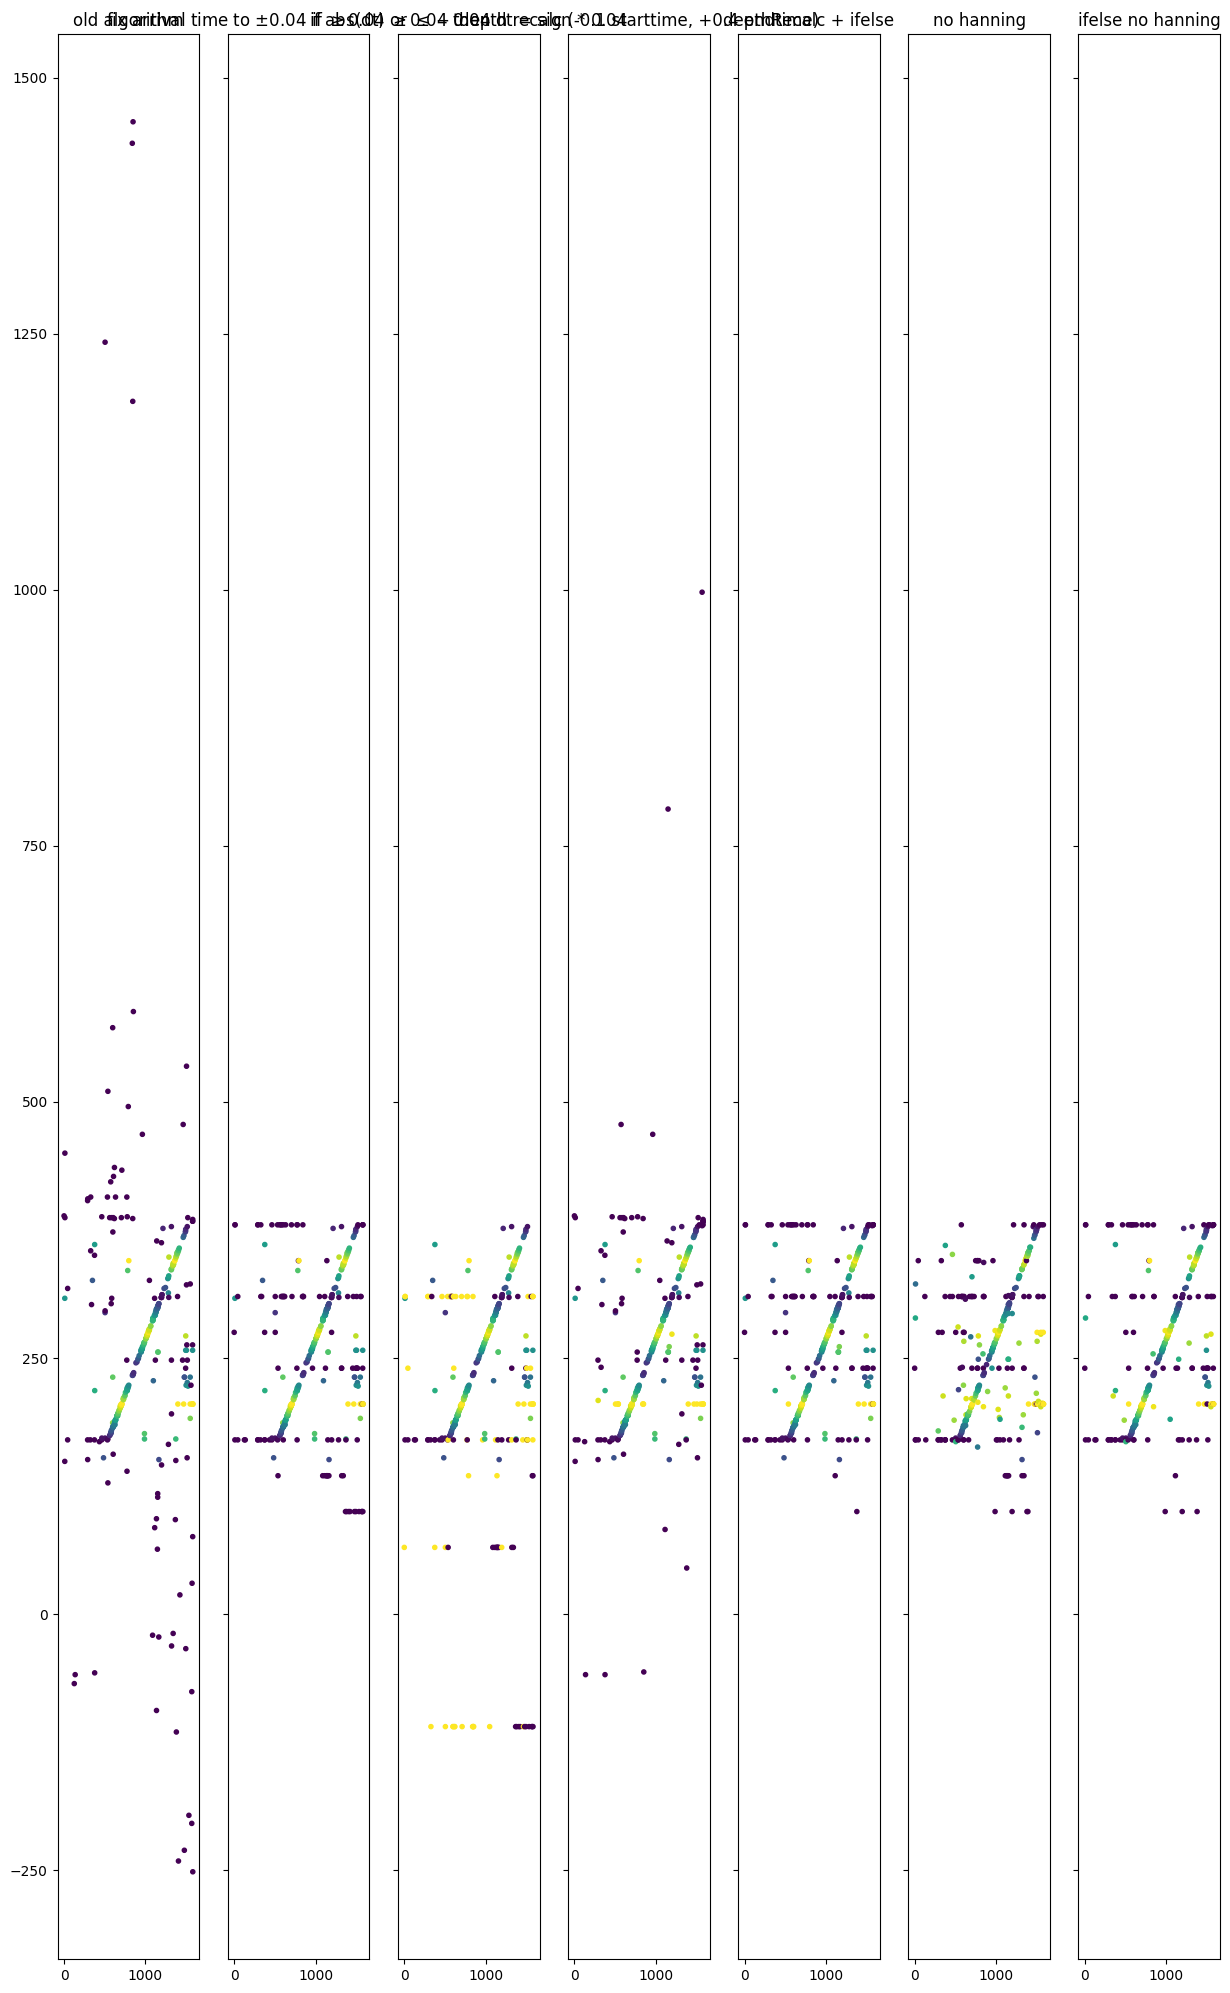

In [8]:
fig, ax = plt.subplots(1, 7, figsize=(15, 25), sharey=True)

t = df211['t'].values
x = df211['depth'].values

cbar = ax[0].scatter(t, x, marker='.', c=df211.dt, vmin=-0.04, vmax=0.0)
ax[0].set_title('old algorithm')

# t2 = (df211_ifelse['dt']*-1).cumsum().values
t2 = pd.to_datetime(df211_ifelse.origin_time).diff().apply(lambda t: t.total_seconds()).fillna(0).cumsum()
x2 = df211_ifelse['depth'].values
ax[1].scatter(t2, x2, marker='.', c=df211_ifelse.dt, vmin=-0.04, vmax=0.0)
ax[1].set_title(r'fix arrival time to $\pm$0.04 if $\geq 0.04$ or $\leq -0.04$')

# t3 = df211_iesign['dt'].cumsum().values
t3 = pd.to_datetime(df211_iesign.origin_time).diff().apply(lambda t: t.total_seconds()).fillna(0).cumsum()
x3 = df211_iesign['depth'].values
ax[2].scatter(t3, x3, marker='.', c=df211_iesign.dt, vmin=-0.04, vmax=0.0)
ax[2].set_title(r'if abs(dt) $\geq 0.04$ then dt = sign * 0.04')

t4 = pd.to_datetime(df211_depthrecalc.origin_time).diff().apply(lambda t: t.total_seconds()).fillna(0).cumsum()
x4 = df211_depthrecalc.depth.values
ax[3].scatter(t4, x4, marker='.', c=df211_depthrecalc.dt, vmin=-0.04, vmax=0.0)
ax[3].set_title('depth recalc (-0.1 starttime, +0.4 endtime)')

t5 = pd.to_datetime(df211_ieDRC.origin_time).diff().apply(lambda t: t.total_seconds()).fillna(0).cumsum()
x5 = df211_ieDRC.depth.values
ax[4].scatter(t5, x5, marker='.', c=df211_ieDRC.dt, vmin=-0.04, vmax=0.0)
ax[4].set_title('depthRecalc + ifelse')
# ax[0].set_ylim(400, 150)

t6 = pd.to_datetime(df211_nohanning.origin_time).diff().apply(lambda t: t.total_seconds()).fillna(0).cumsum().values
x6 = df211_nohanning.depth.values
ax[5].scatter(t6, x6, marker='.', c=df211_nohanning.dt, vmin=-0.04, vmax=0.0)
ax[5].set_title('no hanning')

t7 = pd.to_datetime(df211_ienohanning.origin_time).diff().apply(lambda t: t.total_seconds()).fillna(0).cumsum().values
x7 = df211_ienohanning.depth.values
ax[6].scatter(t7, x7, marker='.', c=df211_ienohanning.dt, vmin=-0.04, vmax=0.0)
ax[6].set_title('ifelse no hanning')

In [ ]:
df141_old = pd.read_csv('141precision-old.csv')
df188_old = pd.read_csv('188precision-old.csv')
df197_old = pd.read_csv('197precision-old.csv')

df141_new = pd.read_csv('141precision.csv')
df188_new = pd.read_csv('188precision.csv')
df197_new = pd.read_csv('197precision.csv')

In [ ]:
fig, ax = plt.subplots(1, 3, sharey=True)

def get_yt(df):
    t = pd.to_datetime(df.origin_time).diff().apply(lambda t: t.total_seconds()).fillna(0).cumsum()
    y = df.depth.values
    return y, t

y, t = get_yt(df141_old)
ax[0].scatter(t, y, marker='.', c=df141_old.dt.values, vmin=-0.04, vmax=0.0)
ax[0].set_title('141 original')

y, t = get_yt(df188_old)
ax[1].scatter(t, y, marker='.', c=df188_old.dt.values, vmin=-0.04, vmax=0.0)
ax[1].set_title('188 original')

y, t = get_yt(df197_old)
ax[2].scatter(t, y, marker='.', c=df197_old.dt.values, vmin=-0.04, vmax=0.0)
ax[2].set_title('197 original')

In [ ]:
fig, ax = plt.subplots(1, 3, sharey=True)

y, t = get_yt(df141_new)
ax[0].scatter(t, y, marker='.', c=df141_new.dt.values, vmin=-0.04, vmax=0.0, cmap='plasma')
ax[0].set_title('141 new algorithm')

y, t = get_yt(df188_new)
ax[1].scatter(t, y, marker='.', c=df188_old.dt.values, vmin=-0.04, vmax=0.0, cmap='plasma')
ax[1].set_title('188 new algorithm')

y, t = get_yt(df197_new)
ax[2].scatter(t, y, marker='.', c=df197_old.dt.values, vmin=-0.04, vmax=0.0, cmap='plasma')
ax[2].set_title('197 new algorithm')

In [ ]:
fig, ax = plt.subplots(1, 3, sharey=True)

limit = 0.1

data = df141_new[df141_new.max_amp>limit]
y, t = get_yt(data)
ax[0].scatter(t, y, marker='.', c=data.dt.values, vmin=-0.04, vmax=0.0, cmap='plasma')
ax[0].set_title('141 new algorithm')

data = df188_new[df188_new.max_amp>limit]
y, t = get_yt(data)
ax[1].scatter(t, y, marker='.', c=data.dt.values, vmin=-0.04, vmax=0.0, cmap='plasma')
ax[1].set_title('188 new algorithm')

data = df197_new[df197_new.max_amp>limit]
y, t = get_yt(data)
ax[2].scatter(t, y, marker='.', c=data.dt.values, vmin=-0.04, vmax=0.0, cmap='plasma')
ax[2].set_title('197 new algorithm')

In [ ]:
fig, ax = plt.subplots(1, 3, sharey=True)

limit = -0.04

data = df141_new[df141_new.dt>limit]
y, t = get_yt(data)
ax[0].scatter(t, y, marker='.', c=data.dt.values, vmin=-0.04, vmax=0.0, cmap='plasma')
ax[0].set_title('141 new algorithm')

data = df188_new[df188_new.dt>limit]
y, t = get_yt(data)
ax[1].scatter(t, y, marker='.', c=data.dt.values, vmin=-0.04, vmax=0.0, cmap='plasma')
ax[1].set_title('188 new algorithm')

data = df197_new[df197_new.dt>limit]
y, t = get_yt(data)
ax[2].scatter(t, y, marker='.', c=data.dt.values, vmin=-0.04, vmax=0.0, cmap='plasma')
ax[2].set_title('197 new algorithm')

ax[0].set_ylim(400, 150)

In [ ]:
fig, ax = plt.subplots(1, 3, sharey=True)

limit = -0.04

data = df141_new[df141_new.dt>limit]
data = data[data.max_amp>0.1]
print(data.shape)
y, t = get_yt(data)
ax[0].scatter(t, y, marker='.', c=data.dt.values, vmin=-0.04, vmax=0.0, cmap='plasma')
ax[0].set_title('141 new algorithm')

data = df188_new[df188_new.dt>limit]
data = data[data.max_amp>0.1]
print(data.shape)
y, t = get_yt(data)
ax[1].scatter(t, y, marker='.', c=data.dt.values, vmin=-0.04, vmax=0.0, cmap='plasma')
ax[1].set_title('188 new algorithm')

data = df197_new[df197_new.dt>limit]
data = data[data.max_amp>0.1]
print(data.shape)
y, t = get_yt(data)
ax[2].scatter(t, y, marker='.', c=data.dt.values, vmin=-0.04, vmax=0.0, cmap='plasma')
ax[2].set_title('197 new algorithm')

ax[0].set_ylim(400, 150)

In [ ]:
fig, ax = plt.subplots(1, 3, sharey=True)

limit = -0.04

data = df141_old[df141_old.dt>limit]
data = data[data.max_amp>0.1]
print(data.shape)
y, t = get_yt(data)
ax[0].scatter(t, y, marker='.', c=data.dt.values, vmin=-0.04, vmax=0.0, cmap='cividis')
ax[0].set_title('141 old algorithm')

data = df188_old[df188_old.dt>limit]
data = data[data.max_amp>0.1]
print(data.shape)
y, t = get_yt(data)
ax[1].scatter(t, y, marker='.', c=data.dt.values, vmin=-0.04, vmax=0.0, cmap='cividis')
ax[1].set_title('188 old algorithm')

data = df197_old[df197_old.dt>limit]
data = data[data.max_amp>0.1]
print(data.shape)
y, t = get_yt(data)
ax[2].scatter(t, y, marker='.', c=data.dt.values, vmin=-0.04, vmax=0.0, cmap='cividis')
ax[2].set_title('197 old algorithm')

ax[0].set_ylim(400, 150)

In [ ]:
df211_depthrecalc.dt.hist(bins=100)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

df211.dt.hist(bins=100, ax=ax[0])
df211_ifelse.dt.hist(bins=100, ax=ax[1])

In [ ]:
pd.to_datetime(df211_ifelse.origin_time).diff().apply(lambda t: t.total_seconds()).plot()

In [ ]:
df211.relative_depth.hist(bins=100)
df211.relative_depth.describe()

In [ ]:
(df211.depth - df211_new.depth).hist(bins=100)

In [ ]:
df211_new.depth